<a href="https://colab.research.google.com/github/calmrocks/master-machine-learning-engineer/blob/main/data/DataClenaup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Common Data Cleaning Techniques

1. **Handling Missing Values**
    - **Dropping missing values**: If a feature or record has too many missing values, it may be best to remove it entirely. However, this approach may lead to a loss of valuable data if used extensively.
    - **Imputing missing values**: For numerical features, you can replace missing values with the mean, median, or mode. For categorical features, the most common value or a placeholder (e.g., "unknown") may be used.
    - **Predictive imputation**: For more sophisticated handling, use machine learning models to predict missing values based on other features. Techniques such as k-nearest neighbors (KNN) imputation can fill in missing data using similar observations.

2. **Outlier Detection and Removal**
    - **Statistical methods**: Use the interquartile range (IQR) or Z-score method to identify outliers. Outliers that fall below or above a certain threshold can be removed or capped.
    - **Domain knowledge**: Sometimes, outliers may actually represent valid data points. Consult domain experts to determine whether outliers should be removed or retained.
    - **Winsorizing**: Replace extreme values with values closer to the mean or median to reduce the effect of outliers without removing data points.

3. **Removing Duplicates**
    - Duplicate records can skew the distribution of data and lead to biased model outcomes. Use duplicate detection techniques to identify and remove duplicate entries, especially in transactional data where repeated records are common.

4. **Standardizing Formats**
    - **Text standardization**: For textual data, convert all text to lowercase, remove special characters, and standardize abbreviations (e.g., “N.Y.” to “New York”).
    - **Date and time formatting**: Convert date and time information to a standardized format (e.g., `YYYY-MM-DD`) to make it easier to work with time-series data.
    - **Categorical standardization**: Standardize categories to ensure consistency across records (e.g., “M” and “Male” both converted to “Male”).

5. **Handling Inconsistent Data Entries**
    - Inconsistent data entries, such as different spellings or formats for the same value, can lead to errors during analysis. For instance, entries like “CA,” “California,” and “Calif” should be standardized to one consistent format.

6. **Removing Irrelevant Features**
    - Some features may not add value to the analysis and can be removed. Use domain knowledge or correlation analysis to identify irrelevant or redundant features.


### Using the Titanic Dataset for Data Cleaning

The **Titanic dataset** contains information about passengers on the Titanic, including details like age, gender, ticket class, and whether they survived. This dataset includes various data issues such as missing values, categorical variables, outliers, and inconsistent entries, allowing us to demonstrate all data cleaning techniques effectively.

#### Why the Titanic Dataset?

- **Variety of Issues**: The Titanic dataset includes missing values, outliers, categorical variables, and irrelevant features.
- **Real-World Relevance**: Its mix of numerical and categorical data reflects typical real-world datasets.
- **Built-in Accessibility**: Available in popular Python libraries like `seaborn`, making it easy to use without external downloads.

The Titanic dataset effectively demonstrates data cleaning techniques while being straightforward to understand and visualize.


#### Loading the Titanic Dataset

We can load the Titanic dataset using `seaborn` or directly download it from online repositories.


In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns

In [ ]:
# Load the Titanic dataset
titanic = sns.load_dataset('titanic')
print(titanic.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


##### 1. Handling Missing Values
The Titanic dataset contains missing values in columns like `age`, `embark_town`, and `deck`.


In [ ]:
# Check for missing values
print(titanic.isnull().sum())



survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [ ]:
# Impute missing numerical values with the median
titanic['age'] = titanic['age'].fillna(titanic['age'].median())


In [ ]:
# Impute missing categorical values with the most frequent value
titanic['embark_town'] = titanic['embark_town'].fillna(titanic['embark_town'].mode()[0])


In [ ]:
# Drop columns with a high percentage of missing values (e.g., deck)
titanic = titanic.drop(columns=['deck'])

In [ ]:
# Check for missing values
print(titanic.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


##### 2. Outlier Detection and Removal
We can identify outliers in numerical columns like `fare` using the interquartile range (IQR) method.


In [ ]:
# Detect and remove outliers using IQR
Q1 = titanic['fare'].quantile(0.25)
Q3 = titanic['fare'].quantile(0.75)
IQR = Q3 - Q1
titanic = titanic[~((titanic['fare'] < (Q1 - 1.5 * IQR)) | (titanic['fare'] > (Q3 + 1.5 * IQR)))]


##### 3. Removing Duplicates
Duplicate rows can occur due to errors in data collection.


In [ ]:
# Remove duplicate rows
titanic = titanic.drop_duplicates()

##### 4. Standardizing Formats
Inconsistent formats can lead to errors during analysis. For example, `embark_town` entries should be consistent.


In [ ]:
# Standardize categorical values
titanic['embark_town'] = titanic['embark_town'].replace({'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'})

##### 5. Handling Inconsistent Data Entries
Columns like `embark_town` might have inconsistent abbreviations or spellings.


In [ ]:
# Replace inconsistent abbreviations with full names
titanic['embark_town'] = titanic['embark_town'].replace({'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'})


##### 6. Removing Irrelevant Features
Not all features are useful for analysis. For example, `name` might not contribute to the survival prediction.


In [ ]:
# Remove irrelevant columns
titanic = titanic.drop(columns=['ticket'])

KeyError: "['ticket'] not found in axis"

#### Cleaned Dataset

After applying these techniques, the dataset is now clean and ready for analysis.


In [ ]:
# Display the cleaned dataset
print(titanic.head())
print(titanic.info())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   
5         0       3    male  28.0      0      0   8.4583        Q  Third   

     who  adult_male  embark_town alive  alone  
0    man        True  Southampton    no  False  
2  woman       False  Southampton   yes   True  
3  woman       False  Southampton   yes  False  
4    man        True  Southampton    no   True  
5    man        True   Queenstown    no   True  
<class 'pandas.core.frame.DataFrame'>
Index: 665 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     665 non-null    int64   
 1   pclass       66

### Data Normalization in Machine Learning

In machine learning, **data normalization** refers to the process of scaling numerical features to ensure they have a uniform distribution or fall within a specific range. Normalization is a critical preprocessing step because many machine learning algorithms perform better when input features are on a similar scale.

#### Why Normalize Data?
1. **Improves Model Performance**: Algorithms like gradient descent converge faster when features are scaled consistently.
2. **Prevents Bias**: Features with larger scales can dominate the model's calculations, leading to biased results.
3. **Enhances Interpretability**: Normalized data ensures that no feature arbitrarily outweighs others due to differences in scale.

#### Common Techniques for Normalization

1. **Min-Max Scaling**  
   This technique scales data to a specific range, usually [0, 1] or [-1, 1].  
   **Formula**:  
   \[
   x_{\text{norm}} = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}
   \]  
   **Use Case**: When features have known minimum and maximum values or when the model expects data in a bounded range.

2. **Z-Score Normalization (Standardization)**  
   This method transforms data to have a mean of 0 and a standard deviation of 1.  
   **Formula**:  
   \[
   x_{\text{norm}} = \frac{x - \mu}{\sigma}
   \]  
   Where:
   - \( \mu \) is the mean of the feature.
   - \( \sigma \) is the standard deviation of the feature.  
   **Use Case**: When data follows a Gaussian (normal) distribution or for algorithms like logistic regression and support vector machines.

3. **Log Normalization**  
   Applies a logarithmic transformation to compress the range of skewed data.  
   **Formula**:  
   \[
   x_{\text{norm}} = \log(x + 1)
   \]  
   **Use Case**: For features with a high level of skewness or outliers.

#### Algorithms Sensitive to Feature Scale
Some machine learning algorithms are particularly sensitive to feature scaling:
- **Gradient Descent-based Models**: Logistic regression, neural networks.
- **Distance-based Models**: K-Nearest Neighbors (KNN), support vector machines (SVM), and clustering algorithms like K-Means.
- **Principal Component Analysis (PCA)**: Relies on variance, which is influenced by feature scale.

#### When Not to Normalize?
- Tree-based algorithms (e.g., Random Forest, XGBoost) are generally scale-invariant and do not require normalization.

#### Key Considerations
- Apply normalization to the **training data** and use the same transformation parameters (e.g., mean, standard deviation) on **test data**.
- Use tools like `StandardScaler` or `MinMaxScaler` from libraries like **scikit-learn** for consistency and efficiency.

Normalization ensures that your data is prepared for optimal model performance, reducing biases introduced by feature magnitude differences.

### Example: Data Normalization with the Iris Dataset

In this example, we will use the **Iris dataset**, a well-known dataset in machine learning, to demonstrate how to apply normalization. The Iris dataset contains features like sepal length, sepal width, petal length, and petal width, which we will normalize.

#### Steps:
1. Load the dataset.
2. Normalize the features using `MinMaxScaler` and `StandardScaler` from `scikit-learn`.
3. Compare the original and normalized data.

In [4]:

# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

# Original data
print("Original Data:")
print(data.describe())

# Apply Min-Max Scaling
min_max_scaler = MinMaxScaler()
data_min_max_scaled = pd.DataFrame(min_max_scaler.fit_transform(data), columns=iris.feature_names)

print("\nMin-Max Scaled Data:")
print(data_min_max_scaled.describe())

# Apply Standard Scaling (Z-Score Normalization)
standard_scaler = StandardScaler()
data_standard_scaled = pd.DataFrame(standard_scaler.fit_transform(data), columns=iris.feature_names)

print("\nStandard Scaled Data:")
print(data_standard_scaled.describe())

Original Data:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  

Min-Max Scaled Data:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean         

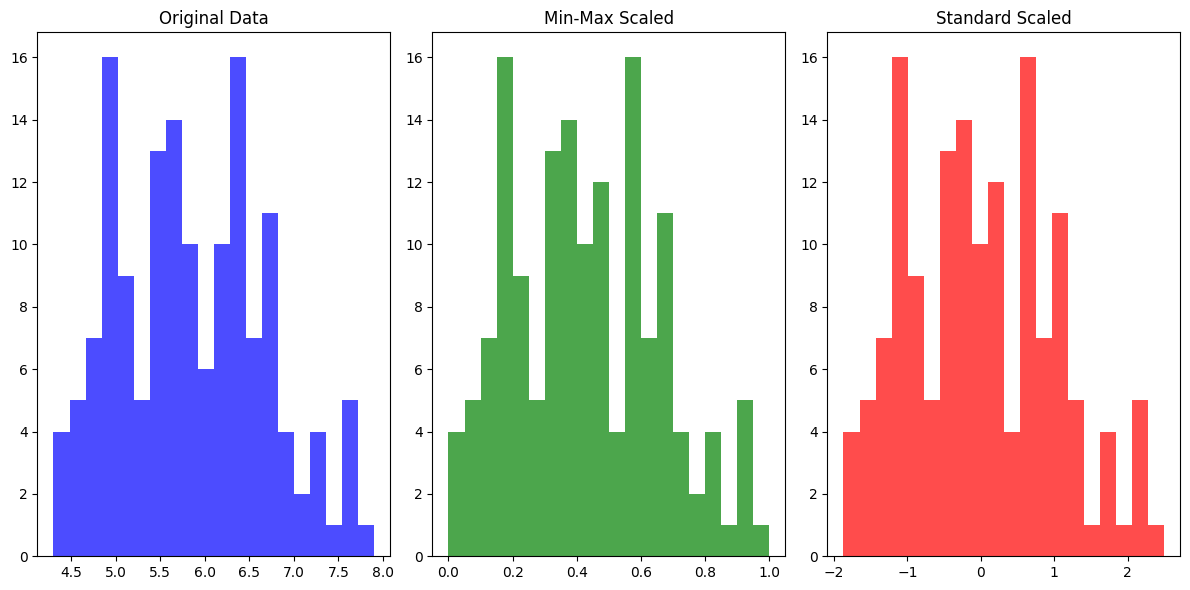

In [5]:
import matplotlib.pyplot as plt

# Plot distributions
feature = 'sepal length (cm)'

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(data[feature], bins=20, color='blue', alpha=0.7)
plt.title('Original Data')

plt.subplot(1, 3, 2)
plt.hist(data_min_max_scaled[feature], bins=20, color='green', alpha=0.7)
plt.title('Min-Max Scaled')

plt.subplot(1, 3, 3)
plt.hist(data_standard_scaled[feature], bins=20, color='red', alpha=0.7)
plt.title('Standard Scaled')

plt.tight_layout()
plt.show()

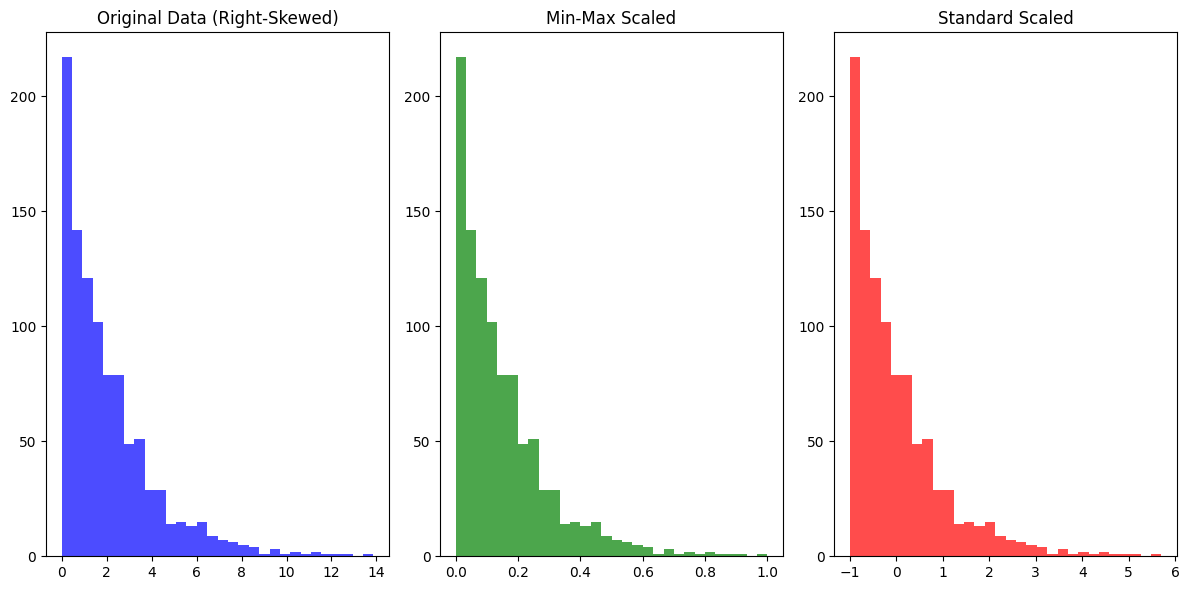

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Generate right-skewed data
data = np.random.exponential(scale=2.0, size=1000).reshape(-1, 1)

# Standard Scaling
scaler_standard = StandardScaler()
data_standard_scaled = scaler_standard.fit_transform(data)

# Min-Max Scaling
scaler_minmax = MinMaxScaler()
data_minmax_scaled = scaler_minmax.fit_transform(data)

# Plot histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(data, bins=30, color='blue', alpha=0.7)
plt.title('Original Data (Right-Skewed)')

plt.subplot(1, 3, 2)
plt.hist(data_minmax_scaled, bins=30, color='green', alpha=0.7)
plt.title('Min-Max Scaled')

plt.subplot(1, 3, 3)
plt.hist(data_standard_scaled, bins=30, color='red', alpha=0.7)
plt.title('Standard Scaled')

plt.tight_layout()
plt.show()